In [ ]:
import os
import json
import re
import numpy as np

from utils.get_url import get_data

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

- Tinha usado este código antes, ma spercebi que era redundante pois meu erro estava em não seleceionar o que eu queria pegar, que era o {index} 'data'.

```
df_normalize = pd.json_normalize(get_data(label)['data'])
df_vagas = pd.DataFrame.from_dict(df_normalize)
```

In [4]:
pd.set_option('display.max_rows', None)

label_dados = 'dados'
label_designer = 'designer'
label_ux = 'ux'


# Transformando dados em Dataframe
df_vagas_dados = pd.DataFrame((get_data(label_dados))['data']) 
df_vagas_designer = pd.DataFrame((get_data(label_designer))['data']) 
df_vagas_ux = pd.DataFrame((get_data(label_ux))['data']) 

Procurando por vagas 'dados'...
Procurando por vagas 'designer'...
Procurando por vagas 'ux'...


In [99]:
# Unindo os Dataframes
df_vagas_list = [df_vagas_dados, df_vagas_designer, df_vagas_ux]
df_vagas = pd.concat(df_vagas_list)
df_vagas = (df_vagas
 .reset_index()
 .replace(r'^\s*$', 'Dado Não Disponível', regex=True)
 )

In [21]:
(df_vagas
 .groupby('state')['name']
 .count()
     )

state
Dado Não Disponível     5
Distrito Federal        1
Espírito Santo          2
Minas Gerais            4
Pernambuco              1
Rio Grande do Sul       3
Rio de Janeiro          1
São Paulo              13
Name: name, dtype: int64

In [59]:
def check_category(x = str):
    if 'dados' in x.lower():
        return 'Dados'
    elif 'designer' in x.lower():
        return 'designer'
    else:
        return 'UX/UI'

In [129]:
df_vagas_consolidado = (
    df_vagas
    .groupby('state')
    .agg(
        vaga_para = ('name', lambda x: check_category(x.iloc[0])),
        mdt_mais_frequentes = ('workplaceType', pd.Series.mode),
        N_Vagas = ('state', 'count'),
    )
    .reset_index()
    .sort_values('N_Vagas', ascending=False)
)

df_vagas_consolidado

,state,vaga_para,mdt_mais_frequentes,N_Vagas
7,São Paulo,designer,hybrid,8
0,Dado Não Disponível,designer,remote,5
5,Rio Grande do Sul,designer,on-site,2
1,Distrito Federal,designer,on-site,1
3,Minas Gerais,designer,hybrid,1
2,Espírito Santo,UX/UI,on-site,1
4,Pernambuco,UX/UI,hybrid,1
6,Rio de Janeiro,designer,on-site,1


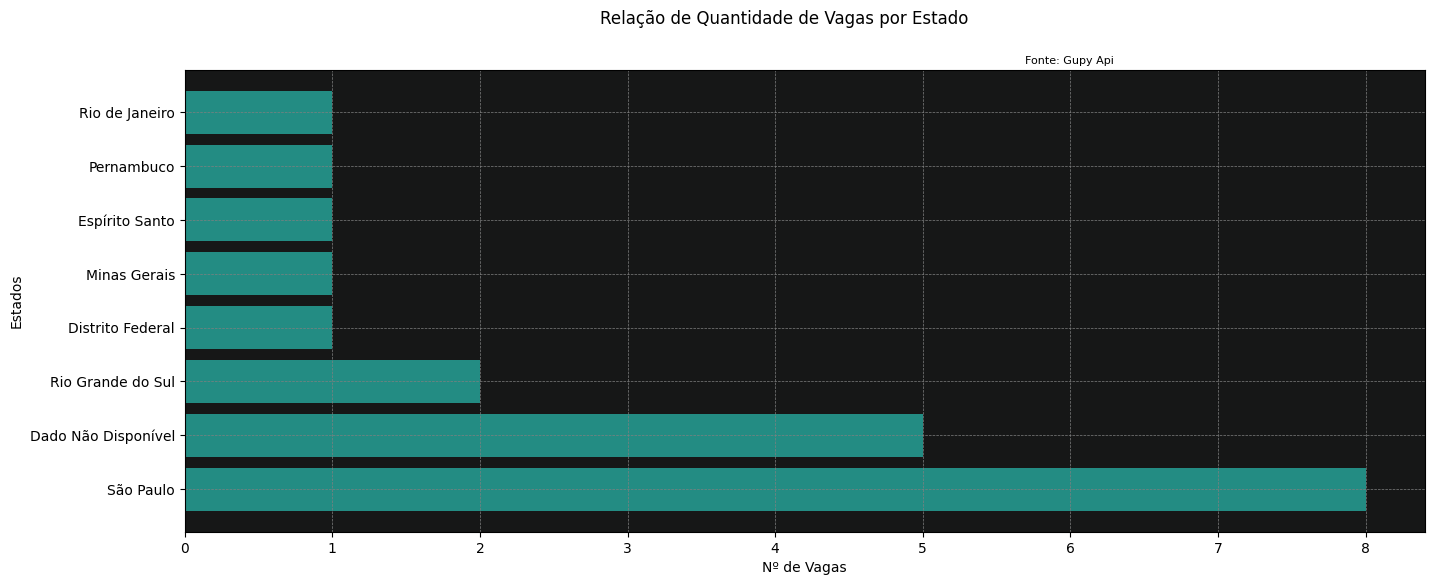

In [130]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.barh(
    df_vagas_consolidado['state'], 
    df_vagas_consolidado['N_Vagas'], 
    color='#238c83'
)

ax.set_facecolor('#161717')

fig.suptitle('Relação de Quantidade de Vagas por Estado')

plt.grid(color='grey', linestyle='--', linewidth = 0.5)
plt.figtext(0.65, 0.89, 'Fonte: Gupy Api', fontsize=8)

plt.xlabel('Nº de Vagas')
plt.ylabel('Estados')

plt.show()

In [132]:
vagas_totais = df_vagas_consolidado['N_Vagas'].sum()
